In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread("C:/Computer Graphics/horse.jpg")
show_horse = cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB)


rainbow = cv2.imread("C:/Computer Graphics/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread("C:/Computer Graphics/bricks.jpg")
show_blue_bricks = cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

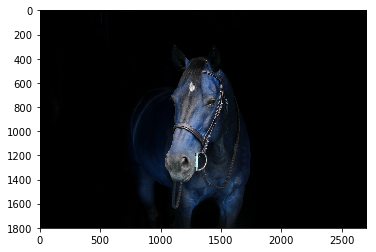

In [3]:
plt.imshow(dark_horse)

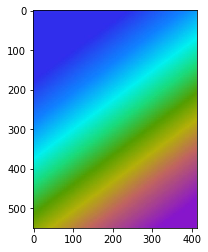

In [4]:
plt.imshow(rainbow)

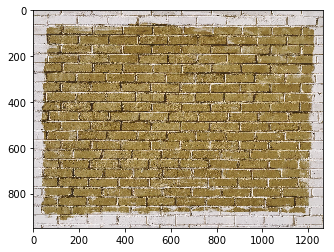

In [5]:
plt.imshow(blue_bricks)

OpenCV Histogram

cv2.calcHist(images, channels, mask, histSize, ranges, hist, accumulate]])

images: it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

channels: it is also given in square brackets. It is the index of chann el for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show a n example later.)

histSize: this represents our BIN count. Need to be given in square bra ckets. For full scale, we pass [256]. 
ranges:  this is our RANGE. Normally, it is [0,256].

In [6]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [7]:
hist_values.shape

(256, 1)

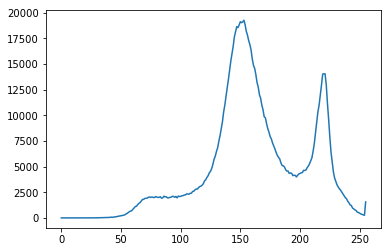

In [8]:
#let us sualuze the contributaion of blue channel
plt.plot(hist_values)

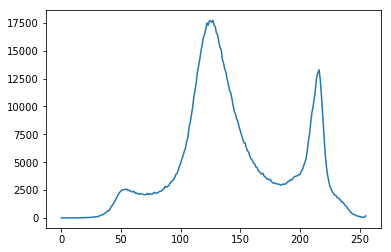

In [9]:
hist_values = cv2.calcHist([blue_bricks],channels=[1],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

This is giving contribution blue channel in the overall images

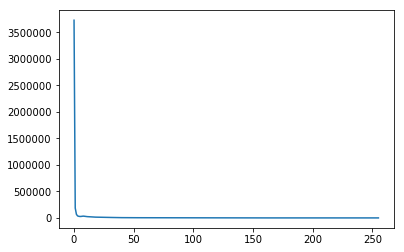

In [10]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

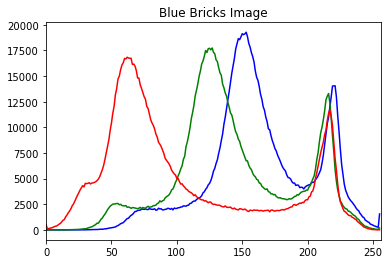

In [11]:
img = blue_bricks
color=('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

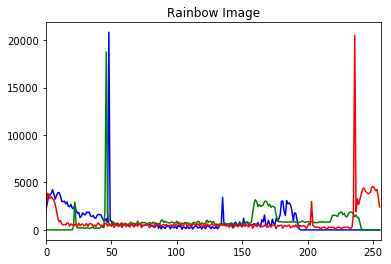

In [12]:
img = rainbow
color=('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

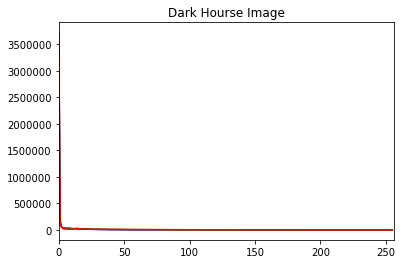

In [13]:
img = dark_horse
color=('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Dark Hourse Image')
plt.show()

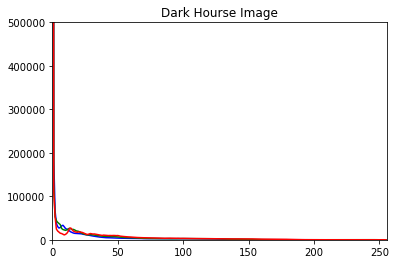

In [14]:
img = dark_horse
color=('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.ylim([0,500000])
plt.title('Dark Hourse Image')
plt.show()

### In Rainbow image

We can mask only certain parts of the image

In [35]:
img = rainbow
img.shape

(550, 413, 3)

In [36]:
#create a mask
mask = np.zeros(img.shape[:2],np.uint8)
mask[300:400, 100:400] = 255

In [37]:
print(mask.dtype) # Check mask data type
mask = mask.astype('uint8') #convert mask to uint if necessary

uint8


In [38]:
show_rainbow_resized =cv2.resize(show_rainbow,(mask.shape[1],mask.shape[0]))

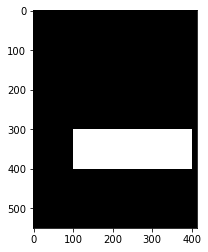

In [39]:
plt.imshow(mask,cmap='gray')

In [40]:
masked_img = cv2.bitwise_and(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_rainbow_resized,show_rainbow_resized,mask=mask)

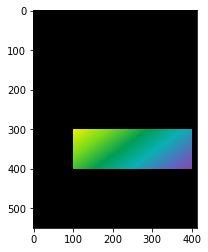

In [41]:
plt.imshow(show_masked_img)

### In Gorilla Image

In [22]:
gorilla = cv2.imread("C:/Computer Graphics/gorilla.jpg")

In [23]:
show_gorilla = cv2.cvtColor(gorilla,cv2.COLOR_BGR2RGB)

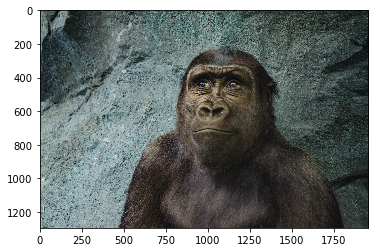

In [24]:
plt.imshow(gorilla)

In [25]:
img = gorilla

In [26]:
img.shape

(1295, 1955, 3)

In [27]:
#create a mask
mask = np.zeros(img.shape[:2],np.uint8)
mask[350:480, 850:1280] = 255

In [28]:
print(mask.dtype) # Check mask data type
mask = mask.astype('uint8')

uint8


In [29]:
show_gorilla_resized =cv2.resize(show_gorilla,(mask.shape[1],mask.shape[0]))

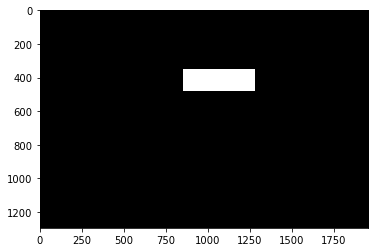

In [30]:
plt.imshow(mask,cmap='gray')

In [31]:
masked_img = cv2.bitwise_and(img,img,mask=mask)
show_masked_img=cv2.bitwise_and(show_gorilla_resized,show_gorilla_resized,mask=mask)

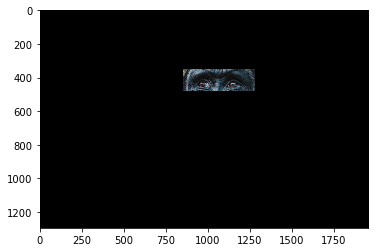

In [32]:
plt.imshow(show_masked_img)

### Again Rainbow Image

Onces the mark is properly formatted, you can safely compute the histogram

In [42]:
hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256])

Text(0.5,1,'histogram for red values of the full images')

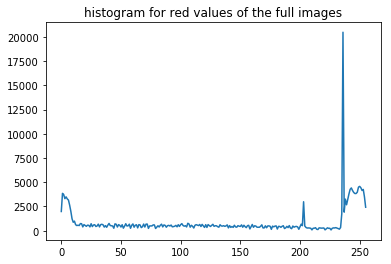

In [43]:
plt.plot(hist_full_values_red)
plt.title('histogram for red values of the full images')

Text(0.5,1,'histogram for red values of the masked images')

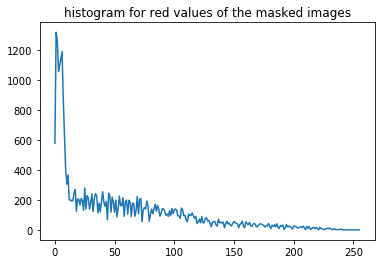

In [44]:
plt.plot(hist_mask_values_red)
plt.title('histogram for red values of the masked images')

### Histogram Equalization

In [53]:
gorilla = cv2.imread("C:/Computer Graphics/gorilla.jpg",0)
'''
Here's a brief overview of the different options for this argument:

0: Read the image in grayscale mode.
1: Read the image in color mode (default), resulting in a 3-channel image 
-1: Read the image with the alpha channel, if it exists, resulting in a 4-channel image

In your case, using @ will load gorilla.jpg as a grayscale image.
'''

"\nHere's a brief overview of the different options for this argument:\n\n0: Read the image in grayscale mode.\n1: Read the image in color mode (default), resulting in a 3-channel image \n-1: Read the image with the alpha channel, if it exists, resulting in a 4-channel image\n\nIn your case, using @ will load gorilla.jpg as a grayscale image.\n"

In [54]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

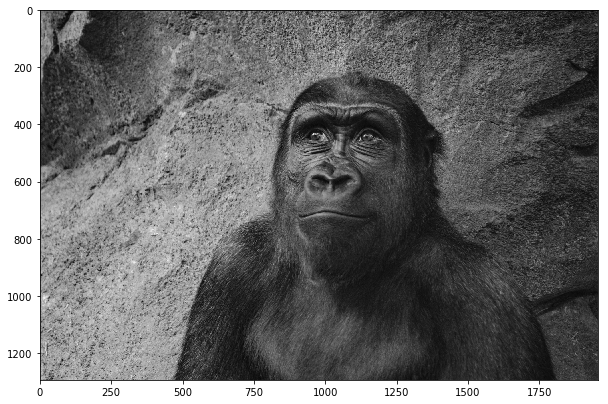

In [55]:
display(gorilla,cmap='gray')

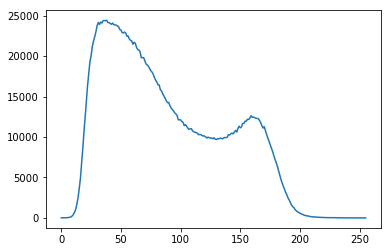

In [56]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

In [ ]:
'''
[gorilla]:

This is the image (or list of images) for which you want to calculate the
channels-[8]:

This specifies the index of the channel you want to compute
the histogram for. Since the image is grayscale, it has only one channel, 
which is indexed as 0.
For color images, you could specify [0] for the blue channel, [1] for the green channel, and [2] for the red channel.
mask-None:

'''

In [57]:
eq_gorilla=cv2.equalizeHist(gorilla)

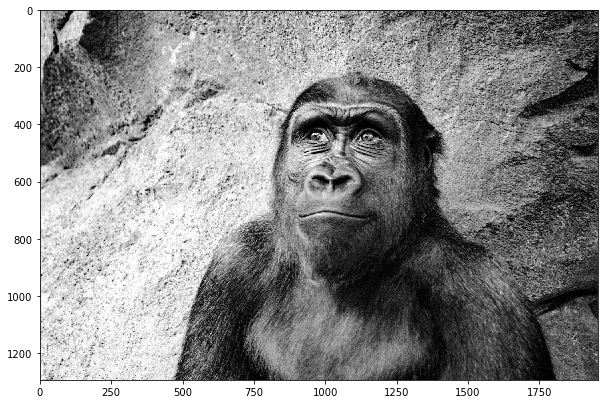

In [58]:
display(eq_gorilla,cmap='gray')

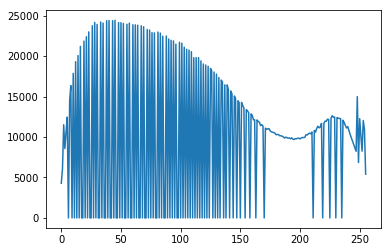

In [60]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

### Color gorilla

In [65]:
color_gorilla = cv2.imread("C:/Computer Graphics/gorilla.jpg")
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
#convert to HSV colorspace
hsv=cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

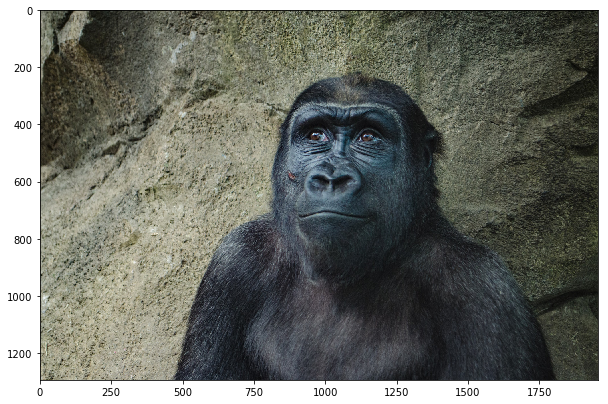

In [66]:
display(show_gorilla)

In [67]:
#Grab V channel
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

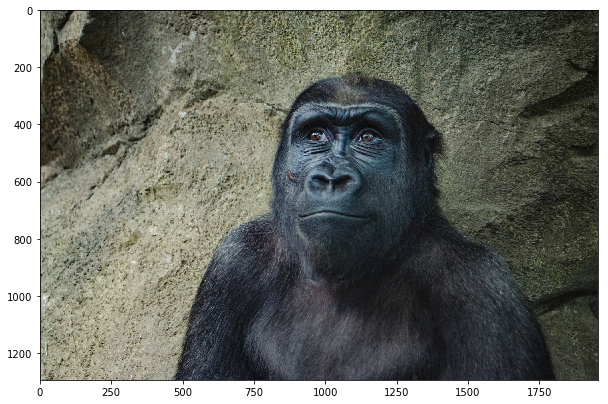

In [69]:
#convert back to RGB to visualize
eq_color_gorilla=cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)

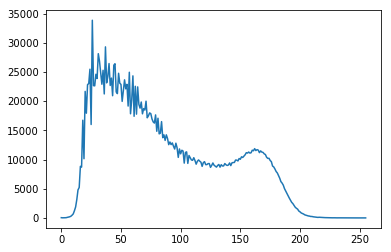

In [70]:
hist_values = cv2.calcHist([eq_color_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

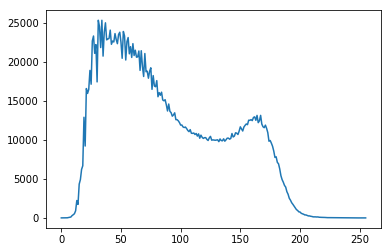

In [71]:
hist_values = cv2.calcHist([eq_color_gorilla],channels=[1],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)